## Install and import libraries

The following three blocks of code install and import the libraries for reinforcement learning. We are still using Keras, but because reinforcement learning also has additional requirements, we also need to install and import the libraries that refer to the problem we are solving (balancing a pole) and a way to vizualize the what the AI is doing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!apt-get update && apt-get install -y xvfb  --fix-missing
!pip install gym
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall18/xvfb -O ../xvfb
!apt-get install -y python-opengl ffmpeg
import os
!bash ../xvfb start
os.environ['DISPLAY'] = ':1' 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.8 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://developer.download.nvi

In [2]:
!pip install gym 
!pip install keras-rl2 --no-deps
!pip install gym[atari,accept-rom-license]==0.21.0 
print('Done!')

     |████████████████████████████████| 52 kB 553 kB/s 
     |████████████████████████████████| 1.5 MB 3.1 MB/s 
     |████████████████████████████████| 1.6 MB 29.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616824 sha256=4c3232018c089b39a318d19317f7a1bf767d3249c1eb4054f56c3afb39640139
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=441027 sha256=4d80623615c98ec6a053d04af55d3a1e467fe05192feba55bde290ca0c93d1b9
  Stored in directory: /root/.cache/pip/wheels/87/67/2e/6147e7912fe37f5408b80d07527dab807c1d25f5c403a9538a
Successfully built gym AutoROM.accept-rom-license
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:


In [3]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import gym

from IPython import display
from PIL import Image

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, Input
from tensorflow.keras.optimizers import Adam

from rl.callbacks import Callback
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

## Import the environment

In this case the environment is the Cart Pole balancing challenge.

In [4]:
ENV_NAME = 'CartPole-v0'

env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

## Creating the model

We use a simple neural network created in Keras.

In [5]:
inp = Input(shape=(1,) + env.observation_space.shape )
x = Flatten()(inp)
x = Dense(16)(x)
x = Activation('relu')(x)
x = Dense(16)(x)
x = Activation('relu')(x)
x = Dense(16)(x)
x = Activation('relu')(x)
x = Dense(nb_actions)(x)
x = Activation('linear')(x)
model = Model(inputs=inp, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272   

This step creates the memory for the neural network and the rewards policy.

In [6]:
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()

This step compiles the model and defines relevant parameters such as the learning rate.

In [7]:
#dual
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=50,
               enable_dueling_network=True, dueling_type='avg', target_model_update=1e-2, policy=policy)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

This bit defines the renderer, which will allow us to vizualize the pole balancing problem in the colab notebook.

In [8]:
class Render(Callback):
    def on_step_end(self, step, logs={}):
        plt.clf()
        plt.imshow(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)

## Training the model

This is the bit that trains the model. You can change the number of steps by changing the number on the "nb_steps" parameter.

In [9]:
# nb_steps represents the number of steps, you can try and change it
dqn.fit(env, nb_steps=2500, visualize=False, log_interval=250)

Training for 2500 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


250/250 [==============================] - 11s 36ms/step - reward: 1.0000
9 episodes - episode_reward: 27.222 [13.000, 60.000] - loss: 0.116 - mae: 0.730 - mean_q: 1.255

Interval 2 (250 steps performed)
250/250 [==============================] - 6s 23ms/step - reward: 1.0000
10 episodes - episode_reward: 21.200 [12.000, 43.000] - loss: 0.088 - mae: 1.600 - mean_q: 3.069

Interval 3 (500 steps performed)
250/250 [==============================] - 3s 14ms/step - reward: 1.0000
13 episodes - episode_reward: 22.462 [11.000, 49.000] - loss: 0.205 - mae: 2.620 - mean_q: 5.016

Interval 4 (750 steps performed)
250/250 [==============================] - 3s 14ms/step - reward: 1.0000
12 episodes - episode_reward: 20.333 [11.000, 47.000] - loss: 0.329 - mae: 3.586 - mean_q: 6.924

Interval 5 (1000 steps performed)
250/250 [==============================] - 3s 14ms/step - reward: 1.0000
8 episodes - episode_reward: 29.875 [18.000, 48.000] - loss: 0.354 - mae: 4.475 - mean_q: 8.791

Interval 6 (1

After training, this bit saves the model.

In [10]:
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

And finally, this bit shows the model in action balancing a pole. Note that, from the moment that the pole starts to lean to one site, the simulation will end because the neural network has failed.

Episode 1: reward: 200.000, steps: 200


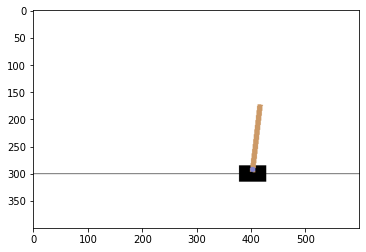

In [12]:
dqn.test(env, nb_episodes=1, callbacks=[Render()], visualize=False)